# Continuous Control

---



### 1. Load and Setup Environment


In [1]:
# Declare agent
import sys

# Add the subfolder to sys.path
sys.path.append('./reacher')

from unityagents import UnityEnvironment
import numpy as np
import importlib
import model
import agent
importlib.reload(agent)
importlib.reload(model)

# env = UnityEnvironment(file_name="Reacher_Windows_x86_64/Reacher.exe")
env = UnityEnvironment(file_name="reacher/Reacher_Multi.app")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))


# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# declare the agent
config = agent.DDPGConfig(
    num_state = state_size,
    num_action = action_size,
    num_agent = num_agents,
    actor_learning_rate=1e-4,
    critic_learning_rate=1e-4,
    batch_size=128,
    update_every_timestamp=20,
    update_time_each_stamp=10,
    discount_factor=0.99,
    replay_buffer_size=1e6,
    weight_decay=0)
agent = agent.DDPGAgent(config)

output_folder_path = "reacher/weights/"


Mono path[0] = '/Users/nuocheng/Desktop/Reinforcement_Learning/Reinforcement-Learning-Projects/reacher/Reacher_Multi.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/nuocheng/Desktop/Reinforcement_Learning/Reinforcement-Learning-Projects/reacher/Reacher_Multi.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Size of each action: 4
There are 20 agents. Each observes a state with length: 33
Number of agents: 20



### 2. Train the Model


Episode 0	Average Score: 0.04	 Total Score: 0.04
Episode 0	Average Score: 0.04	 Total Score: 0.04
Episode 1	Average Score: 0.28	 Total Score: 0.52
Episode 2	Average Score: 0.40	 Total Score: 0.63
Episode 3	Average Score: 0.53	 Total Score: 0.93
Episode 4	Average Score: 0.61	 Total Score: 0.92
Episode 5	Average Score: 0.62	 Total Score: 0.68
Episode 6	Average Score: 0.65	 Total Score: 0.84
Episode 7	Average Score: 0.66	 Total Score: 0.75
Episode 8	Average Score: 0.69	 Total Score: 0.92
Episode 9	Average Score: 0.69	 Total Score: 0.65
Episode 10	Average Score: 0.70	 Total Score: 0.78
Episode 11	Average Score: 0.70	 Total Score: 0.72
Episode 12	Average Score: 0.72	 Total Score: 1.00
Episode 13	Average Score: 0.74	 Total Score: 0.98
Episode 14	Average Score: 0.75	 Total Score: 0.91
Episode 15	Average Score: 0.76	 Total Score: 0.83
Episode 16	Average Score: 0.78	 Total Score: 1.09
Episode 17	Average Score: 0.78	 Total Score: 0.83
Episode 18	Average Score: 0.81	 Total Score: 1.29
Episode 19	

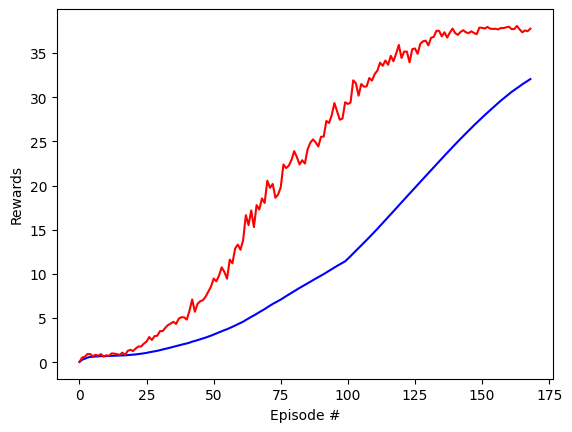

In [2]:

# Function to train the network
from collections import deque
import torch
import matplotlib.pyplot as plt

def train(agent, env, num_agents, folder_path, n_episodes=2000, max_t=1000):

    all_rewards = []
    all_avg_rewards = []
    rewards_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0 : num_agents]
        total_reward = np.zeros(num_agents)
        agent.reset()
        for t in range(max_t):
            # get action from the agent based on the curernt states
            action = agent.act(state)
            # update the env based on the action
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0 : num_agents]
            reward = env_info.rewards[0 : num_agents]
            done = env_info.local_done[0 : num_agents]
            # update the agent
            agent.step(state, action, reward, next_state, done)
            # update for the next iteration
            state = next_state
            total_reward += reward
            # the episode reachs the end, so need to start a new episode
            if np.any( done[0 : num_agents] ):
                break
        all_rewards.append(np.mean(total_reward))
        rewards_window.append(np.mean(total_reward))
        all_avg_rewards.append(np.mean(rewards_window))
        print('Episode {}\tAverage Score: {:.2f}\t Total Score: {:.2f}'.format(i_episode, np.mean(rewards_window), np.mean(total_reward)))
        if i_episode % 100 == 0:
            print('Episode {}\tAverage Score: {:.2f}\t Total Score: {:.2f}'.format(i_episode, np.mean(rewards_window), np.mean(total_reward)))
        if np.mean(rewards_window)>=32.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(rewards_window)))
            break
        if i_episode % 200 == 0:
            agent.save_model(folder_path, '_ep_' + str(i_episode))
    
    return all_rewards, all_avg_rewards

scores, avg_scores = train(agent, env, num_agents, output_folder_path, 2000, 1000)
env.close()

# save the trained weight
agent.save_model(output_folder_path)

# plot the score distribution
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(avg_scores)), avg_scores, color = 'red', label = 'Average Score')
plt.plot(np.arange(len(scores)), scores, color = 'blue', label = 'Score Each Episode')
plt.ylabel('Rewards')
plt.xlabel('Episode #')
plt.show()


### 3. Load and Test a Model

The code block below loads an existing model, and automatically test it with the opened environment

In [ ]:
# Test the model
# Declare agent
import sys

# Add the subfolder to sys.path
sys.path.append('./reacher')

from unityagents import UnityEnvironment
import numpy as np
import importlib
import model
import agent
importlib.reload(agent)
importlib.reload(model)

# env = UnityEnvironment(file_name="Reacher_Windows_x86_64/Reacher.exe")
env = UnityEnvironment(file_name="reacher/Reacher_Multi.app")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))


# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# declare the agent
config = agent.DDPGConfig(
    num_state = state_size,
    num_action = action_size,
    num_agent = num_agents,
    actor_learning_rate=1e-4,
    critic_learning_rate=1e-4,
    batch_size=128,
    update_every_timestamp=20,
    update_time_each_stamp=10,
    discount_factor=0.99,
    replay_buffer_size=1e6,
    weight_decay=0)
output_folder_path = "reacher/weights/"
agent = agent.DDPGAgent(config)
agent.load_model(output_folder_path)

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state
cnt  = 1
for _ in range(3000):
    print(cnt)
    cnt+=1
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    if np.any(env_info.local_done):
        break
env.close()

